# **Preparation**

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

In [4]:
val_dir = "/content/drive/MyDrive/Banana Ripeness Classification/valid"

In [5]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    class_names=['overripe', 'ripe', 'rotten', 'unripe'],
    batch_size=1,
    image_size=(224, 224),
    shuffle=False
)

Found 1685 files belonging to 4 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale=1./255.)

In [7]:
validation_generator = val_datagen.flow_from_directory(val_dir,
                                                       batch_size=1,
                                                       class_mode='categorical',
                                                       target_size=(224, 224),
                                                       shuffle=False)

Found 1685 images belonging to 4 classes.


In [8]:
xception_dir = '/content/drive/MyDrive/Banana Ripeness Classification/banana_xception.zip'
densenet_dir = '/content/drive/MyDrive/Banana Ripeness Classification/banana_densenet121.zip'

In [10]:
!unzip '/content/drive/MyDrive/Banana Ripeness Classification/banana_xception.zip' -d '/content/xception'
!unzip '/content/drive/MyDrive/Banana Ripeness Classification/banana_densenet121.zip' -d '/content/densenet121'

Archive:  /content/drive/MyDrive/Banana Ripeness Classification/banana_xception.zip
   creating: /content/xception/content/checkpoint/xception/
  inflating: /content/xception/content/checkpoint/xception/saved_model.pb  
  inflating: /content/xception/content/checkpoint/xception/keras_metadata.pb  
   creating: /content/xception/content/checkpoint/xception/variables/
  inflating: /content/xception/content/checkpoint/xception/variables/variables.data-00000-of-00001  
  inflating: /content/xception/content/checkpoint/xception/variables/variables.index  
   creating: /content/xception/content/checkpoint/xception/assets/
 extracting: /content/xception/content/checkpoint/xception/fingerprint.pb  
Archive:  /content/drive/MyDrive/Banana Ripeness Classification/banana_densenet121.zip
   creating: /content/densenet121/content/checkpoint/densenet121/
  inflating: /content/densenet121/content/checkpoint/densenet121/keras_metadata.pb  
   creating: /content/densenet121/content/checkpoint/densenet1

In [16]:
target_names = ['overripe', 'ripe', 'rotten', 'unripe']

# **Model Evaluation (Xception)**

In [11]:
model_xception = tf.keras.saving.load_model(
    '/content/xception/content/checkpoint/xception', custom_objects=None, compile=True, safe_mode=True
    )

In [12]:
# evaluate model
print("==========================Evaluate Model====================")
scores_xception = model_xception.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_xception[1]*100))
print("Loss: %.6f%%" % (scores_xception[0]*100))

==========================Evaluate Model====================
1685/1685 [==============================] - 395s 234ms/step - loss: 0.0882 - accuracy: 0.9680
Accuracy: 96.795255%
Loss: 8.816975%


==========================Confusion Matrix====================
1685/1685 [==============================] - 271s 160ms/step


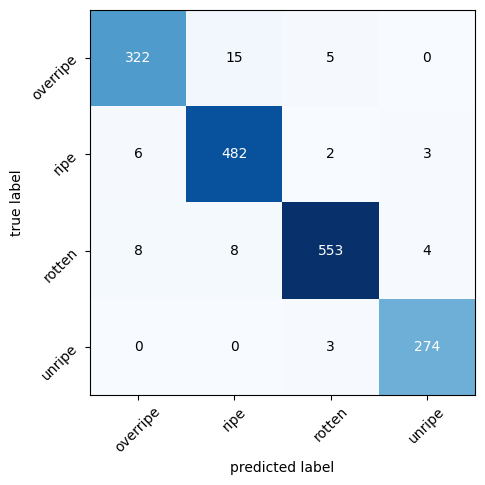

In [13]:
print("==========================Confusion Matrix====================")
y_pred = model_xception.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

In [14]:
print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    overripe       0.96      0.94      0.95       342
        ripe       0.95      0.98      0.97       493
      rotten       0.98      0.97      0.97       573
      unripe       0.98      0.99      0.98       277

    accuracy                           0.97      1685
   macro avg       0.97      0.97      0.97      1685
weighted avg       0.97      0.97      0.97      1685



In [15]:
print("==========================F1 Score====================")
f1_xception = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_xception)

==========================F1 Score====================
F1 Score :  0.9678636933611139


# **Model Evaluation (DenseNet121)**

In [17]:
model_densenet121 = tf.keras.saving.load_model(
    '/content/densenet121/content/checkpoint/densenet121', custom_objects=None, compile=True, safe_mode=True
    )

In [18]:
# evaluate model
print("==========================Evaluate Model====================")
scores_densenet121 = model_densenet121.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_densenet121[1]*100))
print("Loss: %.6f%%" % (scores_densenet121[0]*100))

==========================Evaluate Model====================
1685/1685 [==============================] - 189s 112ms/step - loss: 0.0916 - accuracy: 0.9727
Accuracy: 97.270030%
Loss: 9.164669%


==========================Confusion Matrix====================
1685/1685 [==============================] - 188s 110ms/step


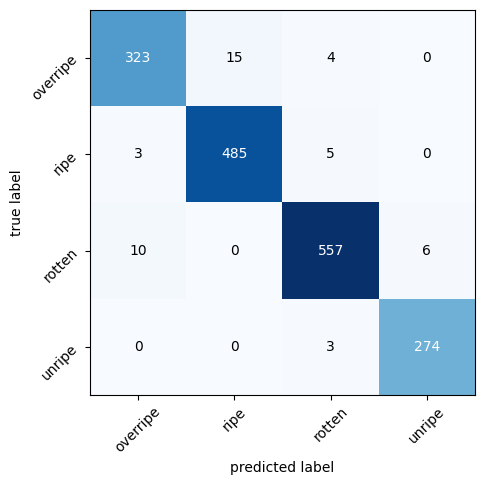

In [19]:
print("==========================Confusion Matrix====================")
y_pred = model_densenet121.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

In [20]:
print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

    overripe       0.96      0.94      0.95       342
        ripe       0.97      0.98      0.98       493
      rotten       0.98      0.97      0.98       573
      unripe       0.98      0.99      0.98       277

    accuracy                           0.97      1685
   macro avg       0.97      0.97      0.97      1685
weighted avg       0.97      0.97      0.97      1685



In [21]:
print("==========================F1 Score====================")
f1_densenet121 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_densenet121)

==========================F1 Score====================
F1 Score :  0.9722409617294482
